In [6]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme(style="whitegrid")
import statistics
import math
plt.rcParams.update({'font.size': 13})
plt.rc('ytick', labelsize=13) 
plt.rc('xtick', labelsize=13) 


In [7]:
# scenarioname = "DoubleHydrogenPrice"
# selected_scenarios = ["iteration1", "doubleH2turbine"]
# selected_scenarios = ["EOM2",  "SR_1yearbeforedecommission", "notexpectSR", "expectStableSR"]

# scenarioname = "SR"
# selected_scenarios = ["EOM", "SR1000", "SR1600",  "SR2000M5","SR3000"]

scenarioname = "CapacityMarketPriceCap"
selected_scenarios = ["EOM3", "CM26000", "CM75000"] 

# scenarioname = "sequencesFINAL"
# selected_scenarios = ["iteration1", "iteration2","iteration3","iteration4", "iteration5","iteration6","iteration7","iteration8","iteration9","iteration10"]

# scenarioname = "SR_with_fix_Peakload"
# selected_scenarios = ["noSR", "Strategic_Reserve_5_1500","Strategic_Reserve_10_1500","Strategic_Reserve_15_1500"]

# scenarioname = "SR_expectations"
# selected_scenarios = ["noSR", "Strategic_Reserve_5_1500", "ExpectingSR", "No_expectingSR"]

# scenarioname = "S1_S2"
# selected_scenarios = ["S1", "S2"]

# scenarioname = "SR_with_without_loans"
# selected_scenarios = ["SR_10_1500_with_loans", "Strategic_Reserve_10_1500"]

# scenarioname = "SR_4years"
# selected_scenarios = ["SR4years_grouped", "SR4years_grouped_not_expectedSR"]

# scenarioname = "SR_German_gas3"
# selected_scenarios = ["EOM_gas3", "SR4_gas3", "SR4_notConsiderSR_gas3"]
  
# scenarioname = "SR_German_not_operationalSR"
# selected_scenarios = ["EOM", "SR4_notoperational", "SR_notoperational_notexpecting"]
  
SIMULATION_YEARS = True

In [8]:
path_to_results = os.path.join(os.getcwd(), "Scenarios", (scenarioname + ".xlsx"))
path_to_plots = os.path.join(os.getcwd(),  "Scenarios", "Comparison_"+ scenarioname )
if not os.path.exists(path_to_plots):
    os.mkdir(path_to_plots)

In [9]:
technology_colors = {
    'Biomass_CHP_wood_pellets_DH': "green",
    "Biomass_CHP_wood_pellets_PH": "greenyellow",
    'Coal PSC': "black",
    "Fuel oil PGT": "gray",
    'Lignite PSC': "darkgoldenrod",
    'CCGT': "indianred",
    'OCGT': "gray",
    'Hydropower_reservoir_medium': "darkcyan",
    'PV_utility_systems': "gold",
    'PV': "gold",
    'PV_residential': "khaki",
    'WTG_onshore': "cornflowerblue",
    "WTG_offshore": "navy",
    "Nuclear": "mediumorchid",
    "Hydropower_ROR": "aquamarine",
    "Lithium_ion_battery": "hotpink",
    "Lithium_ion_battery_charge": "hotpink",
    "Pumped_hydro": "darkcyan",
    "CCGT_CHP_backpressure_DH": "orange",
    "fuel_cell": "gold",
    "electrolyzer": "gray",
    "hydrogen_turbine": "darkred",
    "hydrogen_CHP": "indianred",
    "hydrogen_combined_cycle": "coral"
}
others = {
    'Biomass_CHP_wood_pellets_PH': "greenyellow",
    'Coal PSC': "black",
    "Fuel oil PGT": "gray",
    'Lignite PSC': "darkgoldenrod",
    'CCGT': "indianred",
    'OCGT': "darkred",
    "Pumped_hydro": "darkcyan",
    "CCGT_CHP_backpressure_DH": "orange",
    "Nuclear": "mediumorchid",
    "Hydropower_ROR": "aquamarine"
}
technology_names = {
    'Biomass_CHP_wood_pellets_DH': "Biomass",
    "Biomass_CHP_wood_pellets_PH": "Biomass",
    'Hydropower_reservoir_medium': "Hydro",
    'PV_utility_systems': "PV utility systems",
    'PV_residential': "PV residential",
    'WTG_onshore': "Wind onshore",
    "WTG_offshore": "Wind offhore",
    "Lithium_ion_battery": "Lithium battery",
    "Lithium_ion_battery_charge": "Lithium battery charge",
    "Pumped_hydro": "Pumped hydro",
    "CCGT_CHP_backpressure_DH": "CCGT CHP",
    "hydrogen_turbine": "H2 turbine",
}

In [10]:
CostRecovery_data = pd.read_excel(path_to_results, sheet_name='CostRecovery', index_col=0)

LOL_data = pd.read_excel(path_to_results, sheet_name='LOL', index_col=0)
ENS_data = pd.read_excel(path_to_results, sheet_name='ENS', index_col=0)

SupplyRatio_data = pd.read_excel(path_to_results, sheet_name='SupplyRatio', index_col=0)
ElectricityPrices_data = pd.read_excel(path_to_results, sheet_name='ElectricityPrices', index_col=0)
Monthly_ElectricityPrices_data = pd.read_excel(path_to_results, sheet_name='MonthlyElectricityPrices', index_col=0)

ShareRES_data = pd.read_excel(path_to_results, sheet_name='ShareRES', index_col=0)
Last_year_capacity_data = pd.read_excel(path_to_results, sheet_name='last_year_capacity', index_col=0)
InstalledCapacity_data = pd.read_excel(path_to_results, sheet_name='InstalledCapacity', index_col=0)
Info_data = pd.read_excel(path_to_results, sheet_name='Info', index_col=0)
Last_year_prices_data = pd.read_excel(path_to_results, sheet_name='Last_year_pdc', index_col=0)
Invested_capacity_data = pd.read_excel(path_to_results, sheet_name='Invested', index_col=0)
Dismantled_capacity_data = pd.read_excel(path_to_results, sheet_name='Dismantled', index_col=0)
H2Production_data = pd.read_excel(path_to_results, sheet_name='H2Production', index_col=0)
AverageNPVpertechnology = pd.read_excel(path_to_results, sheet_name='AverageNPVpertechnology',  header=[0,1], index_col=0)
AverageProfits = pd.read_excel(path_to_results, sheet_name='Profits',  header=[0,1], index_col=0)

In [11]:
NPVNewPlants_data = pd.read_excel(path_to_results, sheet_name='overallNPV', index_col=0)
IRRNewPlants_data = pd.read_excel(path_to_results, sheet_name='overallIRR', index_col=0)

In [12]:
#LifeExtension = pd.read_excel(path_to_results, sheet_name='lifeextension',  header=[0,1], index_col=0)
# LifeExtension
# LifeExtension.plot()

In [13]:
InstalledCapacity_data.drop([2046, 2047,2048,2049, 2050], inplace=True)
# InstalledCapacity_data.drop([-4, -3,-2,-1, 0, 40, 41,42,43], inplace=True)

In [14]:
# axs1 = sns.lineplot(data=Coststosociety_data, palette="tab10", linewidth=2.5)
# plt.grid()
# sns.set_style("whitegrid")
# plt.grid()
# plt.xlabel('Years', fontsize='medium')
# plt.ylabel('Eur', fontsize='medium')
# plt.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
# axs1.set_title('Costs to Society')
# fig1 = axs1.get_figure()
# fig1.savefig(path_to_plots + '/' + 'Costs to Society.png', bbox_inches='tight', dpi=300)

# fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
# ax1.plot(Coststosociety_data)
# #ax1 = sns.lineplot(data=LOL_data, palette="tab10", linewidth=2.5)
# plt.ylabel('Costs to Society (EUR/MWh)', fontsize='large')
# plt.ylim([50, 80])
# ax1.legend(Coststosociety_data.columns.values, bbox_to_anchor=(1, 1.2), fontsize='large')
# ax2.plot(Coststosociety_data)
# #ax2 = sns.lineplot(data=LOL_data, palette="tab10", linewidth=2.5)
# plt.xlabel('Years', fontsize='large')
# fig.savefig(path_to_plots + '/' + 'Costs to Society.png', bbox_inches='tight', dpi=300)

<AxesSubplot:>

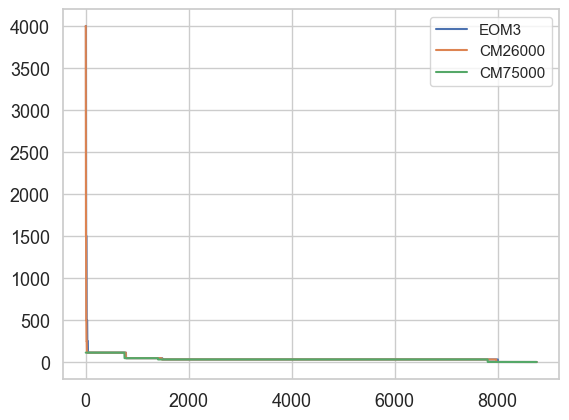

In [15]:
Last_year_prices_data.plot()
#sorted_prices = electricity_prices.apply(lambda x: x.sort_values(ascending=False).values)


In [16]:
NPVNewPlants_data

,EOM3,CM26000,CM75000
Lithium_ion_battery,NaN,NaN,NaN
WTG_offshore,8.000874e+07,1.513519e+08,7.723382e+07
hydrogen_turbine,-3.903130e+07,-1.536028e+08,-3.906411e+07
PV_utility_systems,5.231994e+06,-7.789920e+06,-1.190355e+07
WTG_onshore,7.196505e+08,6.859240e+08,6.253974e+08
Biomass_CHP_wood_pellets_DH,NaN,NaN,NaN
PV_residential,NaN,NaN,NaN
Nuclear,NaN,NaN,NaN
Lithium_ion_battery_charge,NaN,NaN,NaN


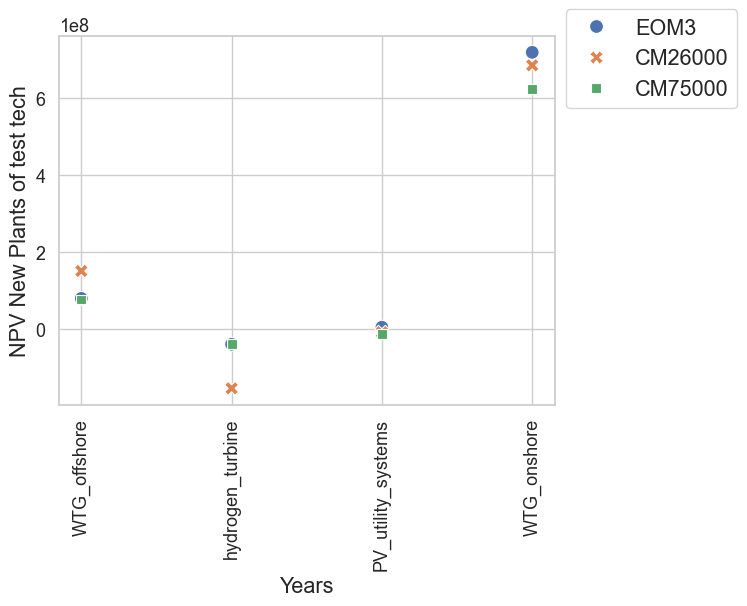

In [17]:
axs1 = sns.scatterplot(data=NPVNewPlants_data, s=100)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('NPV New Plants of test tech', fontsize='large')
plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs2.set_title('NPV new power plants')
plt.xticks(rotation=90)   
fig1 = axs1.get_figure()
fig1.savefig(path_to_plots + '/' + 'NPVNewPlants.png', bbox_inches='tight', dpi=300)

In [18]:
Dismantled_capacity_data *= -1

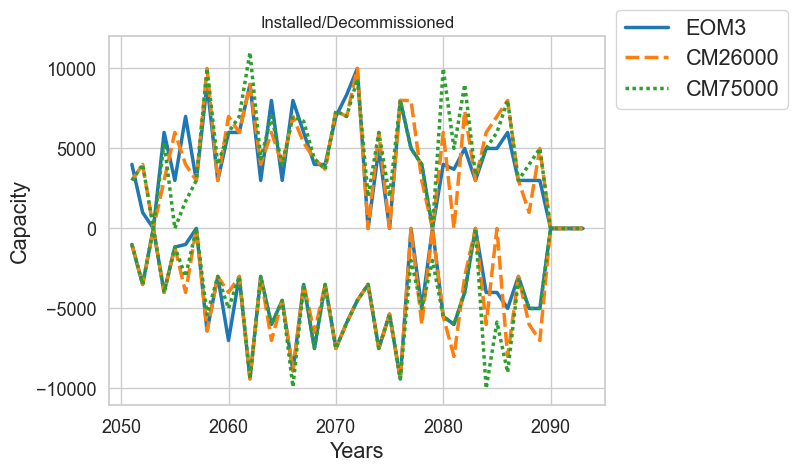

In [19]:
Dismantled_capacity_data.drop([2046, 2047,2048,2049,2050], inplace = True)
Invested_capacity_data.drop([2046, 2047,2048,2049,2050], inplace = True)

# Dismantled_capacity_data.drop([-4, -3,-2,-1, 0], inplace = True)
# Invested_capacity_data.drop([-4, -3,-2,-1, 0], inplace = True)

axs2 = sns.lineplot(data=Dismantled_capacity_data, palette="tab10", linewidth=2.5)
axs2 = sns.lineplot(data=Invested_capacity_data, palette="tab10", linewidth=2.5, legend = None) 
#sns.lineplot(data=Invested_capacity_data,palette="tab10", linewidth=2.5,    ax=axs2, legend = None)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Capacity', fontsize='large')
plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
axs2.set_title('Installed/Decommissioned')
fig2 = axs2.get_figure()
fig2.savefig(path_to_plots + '/' + 'Invested_Dismantled_ Capacity.png', bbox_inches='tight', dpi=300)

In [20]:
InstalledCapacity_data.drop([ 2090,2091,2092, 2093], inplace=True)

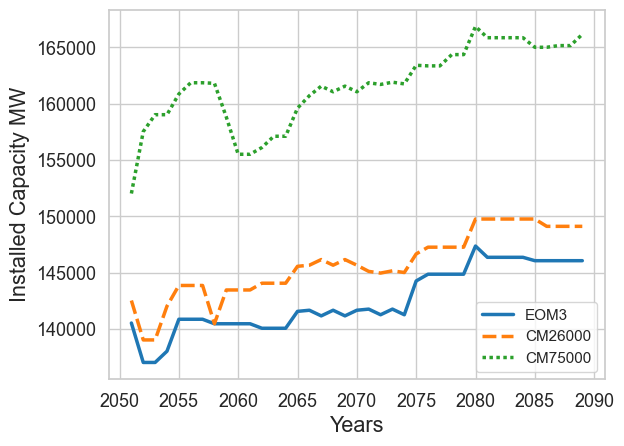

In [21]:
InstalledCapacity_data
axs2 = sns.lineplot(data=InstalledCapacity_data, palette="tab10", linewidth=2.5)

plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Installed Capacity MW', fontsize='large')
#plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs2.set_title('Market-based Cost recovery')
fig2 = axs2.get_figure()
fig2.savefig(path_to_plots + '/' + 'InstalledCapacity.png', bbox_inches='tight', dpi=300)

In [22]:
melted = pd.melt(CostRecovery_data )

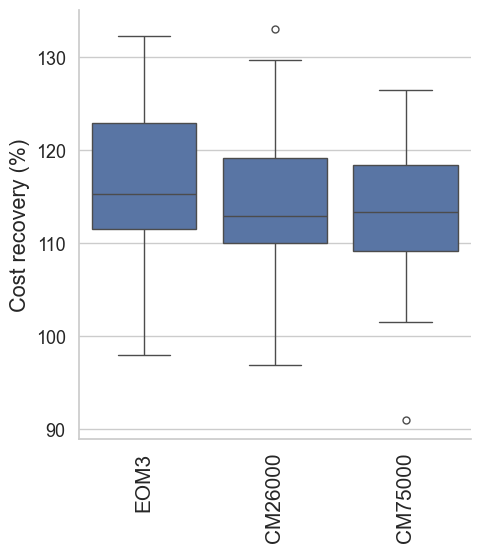

In [23]:
axs33 = sns.catplot(data=melted, x="variable", y="value",  kind="box")
#plt.xlabel('Weather profiles sequence', fontsize='large')
plt.xlabel('', fontsize='large')
plt.ylabel('Cost recovery (%)', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=90, size = 15)   
#fig3 = axs33.get_figure()
axs33.savefig(path_to_plots + '/' + 'Cost_Recovery_boxes.png', bbox_inches='tight', dpi=300)

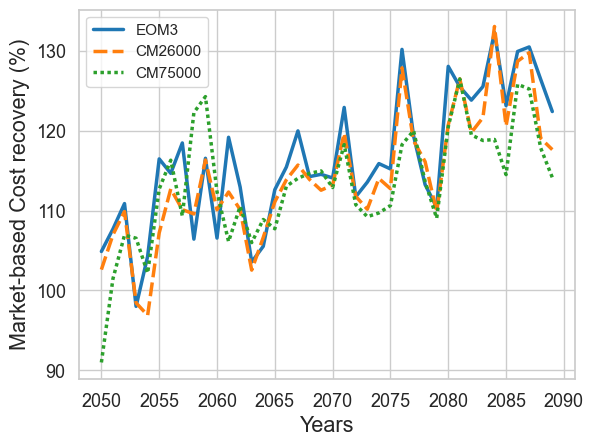

In [24]:
#CostRecovery_data.drop([2050], inplace=True)
axs3 = sns.lineplot(data=CostRecovery_data, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Market-based Cost recovery (%)', fontsize='large')
#plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs2.set_title('Market-based Cost recovery')
fig3 = axs3.get_figure()
fig3.savefig(path_to_plots + '/' + 'Cost_Recovery.png', bbox_inches='tight', dpi=300)

In [25]:
# CostRecovery_data_substracted = CostRecovery_data.sub(CostRecovery_data['fix_profiles'], axis=0)
# axs3 = sns.lineplot(data=CostRecovery_data_substracted, palette="tab10", linewidth=2.5)
# plt.grid()
# sns.set_style("whitegrid")
# plt.grid()
# plt.xlabel('Years', fontsize='large')
# plt.ylabel('Market-based Cost recovery (Eur)', fontsize='large')
# plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
# #axs2.set_title('Market-based Cost recovery')
# fig3 = axs3.get_figure()
# fig3.savefig(path_to_plots + '/' + 'Cost_Recovery_substracted.png', bbox_inches='tight', dpi=300)
# axs33 = sns.catplot(data=pd.melt(CostRecovery_data_substracted ), x="variable", y="value",  kind="box")
# plt.xlabel('Weather profiles sequence', fontsize='large')
# plt.ylabel('Cost recovery (%)', fontsize='large')
# plt.tight_layout()
# plt.xticks(rotation=90, size = 15)   
# fig3 = axs3.get_figure()
# fig3.savefig(path_to_plots + '/' + 'Cost_Recovery_difference.png', bbox_inches='tight', dpi=300)

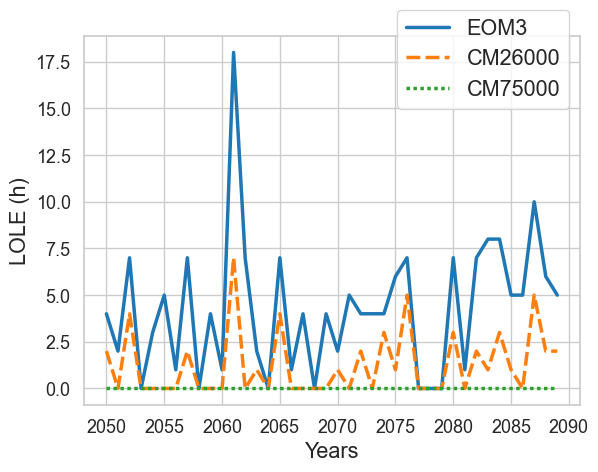

In [26]:
#LOL_data.drop([2050], inplace=True)
# fig, axes = plt.subplots(nrows=2, ncols=1)
# sns.set_style("whitegrid")
# sns.lineplot(data=LOL_data,palette="tab10", linewidth=2.5,  ax=axes[0], legend = None)
# plt.ylim([0, 25])
# plt.ylabel('Hours', fontsize='large')

# sns.lineplot(data=LOL_data,palette="tab10", linewidth=2.5,    ax=axes[1], legend = None)
# plt.ylim([0, 220])
# #axes[1].legend(LOL_data.columns.values, fontsize='medium',  bbox_to_anchor=(1, 1.1))
# plt.ylabel('Hours', fontsize='large')
# axes[0].set_title('LOLE')
# fig.savefig(path_to_plots + '/' + 'LOLE.png', bbox_inches='tight', dpi=300)
axs6 = sns.lineplot(data=LOL_data, palette="tab10", linewidth=2.5, )
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('LOLE (h)', fontsize='large')
plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs6.set_title('LOLE')
fig6 = axs6.get_figure()
fig6.savefig(path_to_plots + '/' + 'LOLEs.png', bbox_inches='tight', dpi=300)

In [27]:
#LOL_data_substracted = LOL_data.sub(LOL_data["fix_profiles"], axis=0)

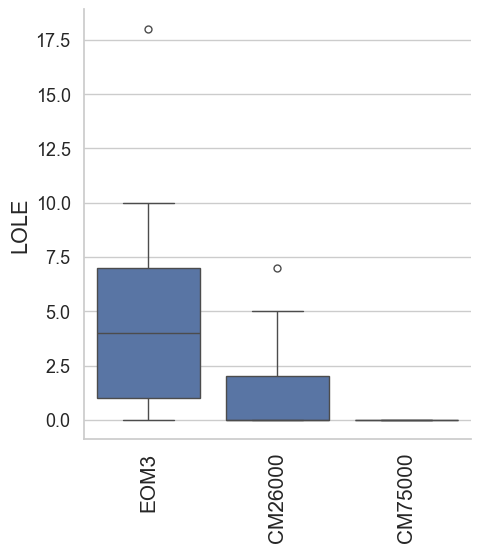

In [28]:
axs1 = sns.catplot( data=pd.melt(LOL_data), x="variable", y="value",  kind="box")
plt.xlabel('', fontsize='large')
plt.ylabel('LOLE', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=90, size = 15)  

axs1.savefig(path_to_plots + '/' + 'LOLE_boxes.png', bbox_inches='tight', dpi=300)

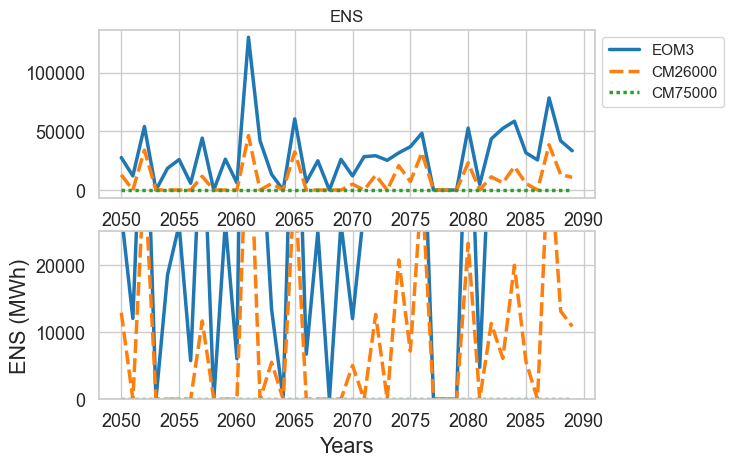

In [29]:

fig, axes= plt.subplots(nrows=2, ncols=1)

sns.lineplot(data=ENS_data, palette="tab10", linewidth=2.5, ax=axes[0])
plt.ylabel('MWh', fontsize='medium')

sns.move_legend(axes[0], "upper left", bbox_to_anchor=(1, 1))
plt.ylim([0, 25000])


sns.lineplot(data=ENS_data, palette="tab10", linewidth=2.5, ax=axes[1], legend=None)
#plt.legend(fontsize='large',  bbox_to_anchor=(2, 1.1))
plt.xlabel('Years', fontsize='large')
plt.ylabel('ENS (MWh)', fontsize='large')

axes[0].set_title('ENS')
fig.savefig(path_to_plots + '/' + 'Energy not supplied.png', bbox_inches='tight', dpi=300)

In [30]:
ENS_data.head()

,EOM3,CM26000,CM75000
year,,,
2050,27636.847390,12879.994988,0
2051,12033.270571,0.000000,0
2052,54116.180544,33981.417333,0
2053,0.000000,0.000000,0
2054,18523.631114,0.000000,0


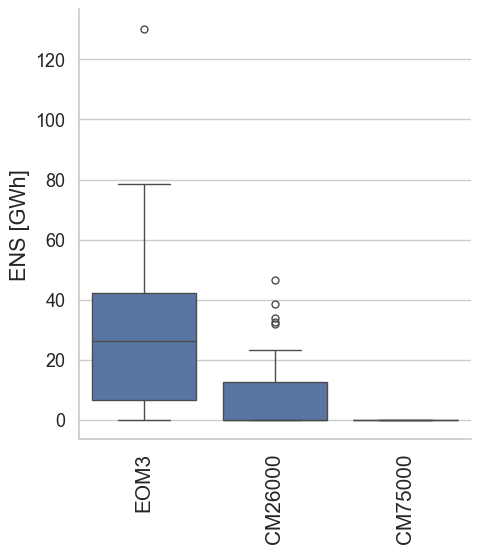

In [31]:
ENS_data_GWH = ENS_data/1000
axs1 = sns.catplot( data=pd.melt(ENS_data_GWH), x="variable", y="value",  kind="box")
plt.xlabel('', fontsize='large')
plt.ylabel('ENS [GWh]', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=90, size = 15)   
axs1.savefig(path_to_plots + '/' + 'ENS_boxes.png', bbox_inches='tight', dpi=300)

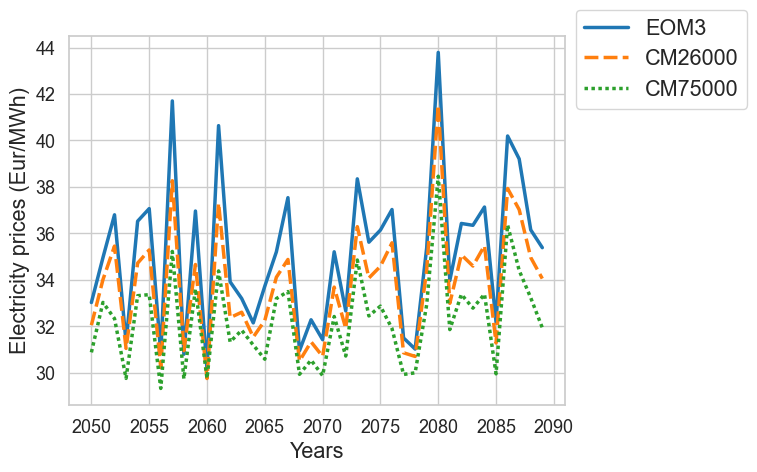

In [32]:
#CostRecovery_data.plot()
#ElectricityPrices_data.drop([2050], inplace=True)
axs6 = sns.lineplot(data=ElectricityPrices_data, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Electricity prices (Eur/MWh)', fontsize='large')
plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs6.set_title('Electricity prices')
fig6 = axs6.get_figure()
fig6.savefig(path_to_plots + '/' + 'Electricity prices.png', bbox_inches='tight', dpi=300)

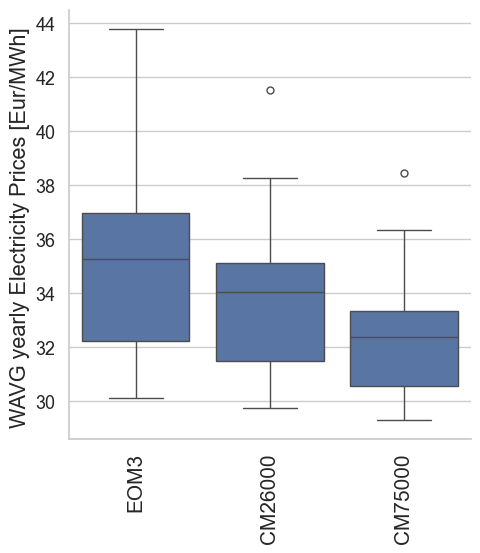

In [33]:
axs1 = sns.catplot( data=pd.melt(ElectricityPrices_data), x="variable", y="value",  kind="box")
plt.xlabel('', fontsize='large')
plt.ylabel('WAVG yearly Electricity Prices [Eur/MWh] ', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=90, size = 15)   
axs1.savefig(path_to_plots + '/' + 'Electicity_prices_boxes.png', bbox_inches='tight', dpi=300)

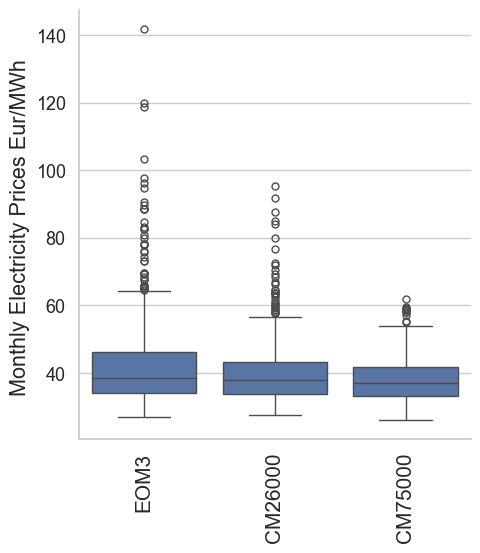

In [34]:
axs1 = sns.catplot( data=pd.melt(Monthly_ElectricityPrices_data), x="variable", y="value",  kind="box")
plt.xlabel('', fontsize='large')
plt.ylabel('Monthly Electricity Prices Eur/MWh ', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=90, size = 15)
axs1.savefig(path_to_plots + '/' + 'Monthly_Electicity_prices_boxes.png', bbox_inches='tight', dpi=300)

In [35]:
Monthly_ElectricityPrices_data

,EOM3,CM26000,CM75000
0,65.846810,54.175908,44.163235
1,48.214543,45.614365,43.764696
2,41.479801,39.865783,38.878827
3,31.051323,30.521231,30.145692
4,29.647639,29.468460,29.238074
...,...,...,...
475,35.793526,34.995378,34.298686
476,38.196450,38.068877,36.486526
477,46.265538,41.542464,37.237476
478,63.213844,55.668568,47.459673


In [36]:
selected_scenarios

['EOM3', 'CM26000', 'CM75000']

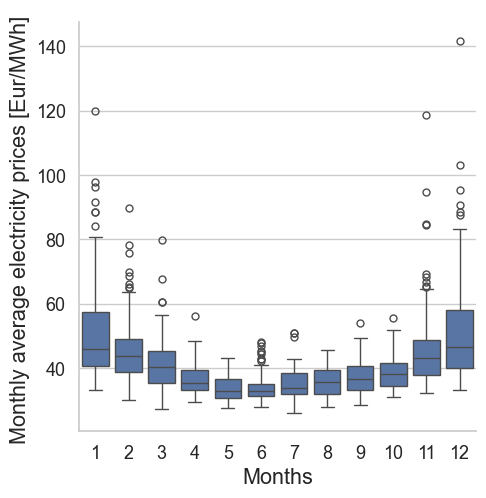

In [37]:
months = list(range(1,13))*40
mlted_monthly_prices = Monthly_ElectricityPrices_data[selected_scenarios].copy()
mlted_monthly_prices['group'] = months
monthly_melted_electricity_prices = mlted_monthly_prices.melt(id_vars='group', var_name='Variable', value_name='Value')
axs1 = sns.catplot( data=monthly_melted_electricity_prices, x="group", y="Value",  kind="box")
plt.xlabel('Months', fontsize='large')
plt.ylabel('Monthly average electricity prices [Eur/MWh] ', fontsize='large')
axs1.savefig(path_to_plots + '/' + 'Monthly_Electricity_prices.png', bbox_inches='tight', dpi=300)

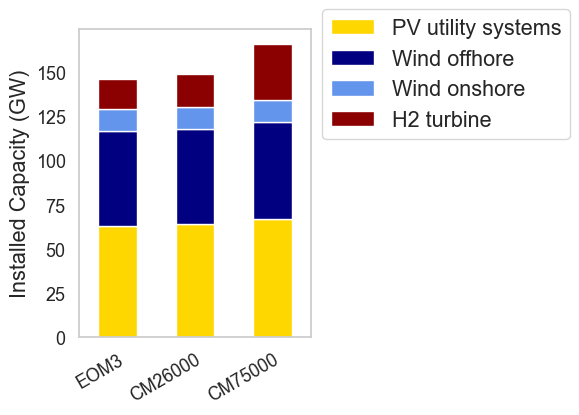

In [38]:
cpacities = Last_year_capacity_data.T
cpacities = cpacities/1000
cpacities_nozeroes = cpacities[cpacities>0]
cpacities_nozeroes.dropna(how='all', axis =1, inplace=True)
colors = [technology_colors[tech] for tech in cpacities_nozeroes.columns.values]
cpacities_nozeroes.rename(columns=technology_names, inplace=True)
axs9 = cpacities_nozeroes.plot(kind='bar', stacked=True, color=colors, figsize = (3,4))
plt.grid()
sns.set_style("whitegrid")
axs9.set_xticklabels(cpacities_nozeroes.index.values, rotation = 30,  rotation_mode="anchor", ha="right")
plt.ylabel('Installed Capacity (GW)', fontsize='large')
plt.legend(fontsize='large', loc='upper left', bbox_to_anchor=(1, 1.1))
fig9 = axs9.get_figure()
fig9.savefig(path_to_plots + '/' + 'Last year capacity.png', bbox_inches='tight', dpi=300)


In [39]:
cpacities_nozeroes

,PV utility systems,Wind offhore,Wind onshore,H2 turbine
EOM3,63.05,54.0,12.0,17.0
CM26000,64.10,54.0,12.0,19.0
CM75000,67.15,55.0,12.0,32.0


In [40]:
row_totals = cpacities_nozeroes.sum(axis=1)
share_capacities = pd.DataFrame()
# Create new columns with percentages for each column
for column in cpacities_nozeroes.columns:
    share_capacities[column] = (cpacities_nozeroes[column] / row_totals) * 100
share_capacities


,PV utility systems,Wind offhore,Wind onshore,H2 turbine
EOM3,43.170147,36.973639,8.216364,11.639849
CM26000,42.991281,36.217304,8.048290,12.743125
CM75000,40.415287,33.102618,7.222389,19.259705


C:\Users\isanchezjimene\AppData\Local\Temp\ipykernel_26264\2663921347.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(newcolumns, rotation = 30,  rotation_mode="anchor", ha="left")


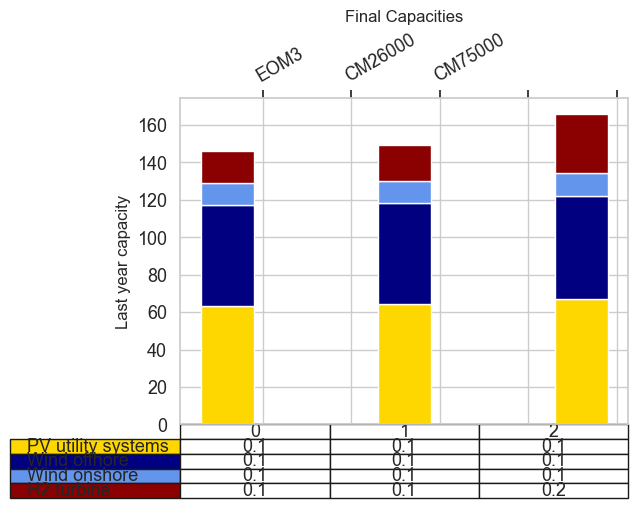

In [41]:
final_year_capacities = cpacities_nozeroes.T
data =final_year_capacities.values
columns = list(range(0, len(final_year_capacities.columns))) #final_year_capacities.columns
newcolumns = final_year_capacities.columns.insert(0, "new")
rows = final_year_capacities.index

n_rows = len(data)
bar_width = 0.3
index = np.arange(len(columns)) + bar_width

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
fig, axs = plt.subplots()
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
#colors = colors[::-1]
#cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      cellLoc ='center',
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.title('Final Capacities')
plt.ylabel("Last year capacity")

ax = plt.gca()
ax.xaxis.tick_top()
ax.set_xticklabels(newcolumns, rotation = 30,  rotation_mode="anchor", ha="left")
# plt.show()
# plt.savefig(path_to_plots + '/' + 'Last year capacity with numbers.png')
fig10 = plt.gcf()
fig10.savefig(path_to_plots + '/' + 'Last year capacity with numbers.png', bbox_inches='tight', dpi=300)

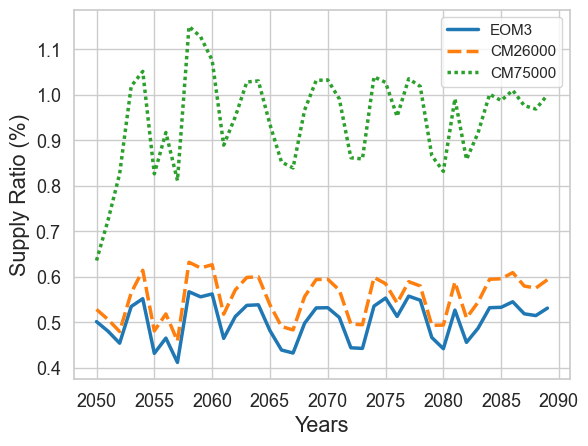

In [42]:
axs7 = sns.lineplot(data=SupplyRatio_data, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Supply Ratio (%)', fontsize='large')
#plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs7.set_title('Supply Ratio')
fig7 = axs7.get_figure()
fig7.savefig(path_to_plots + '/' + 'Supply Ratio.png', bbox_inches='tight', dpi=300)


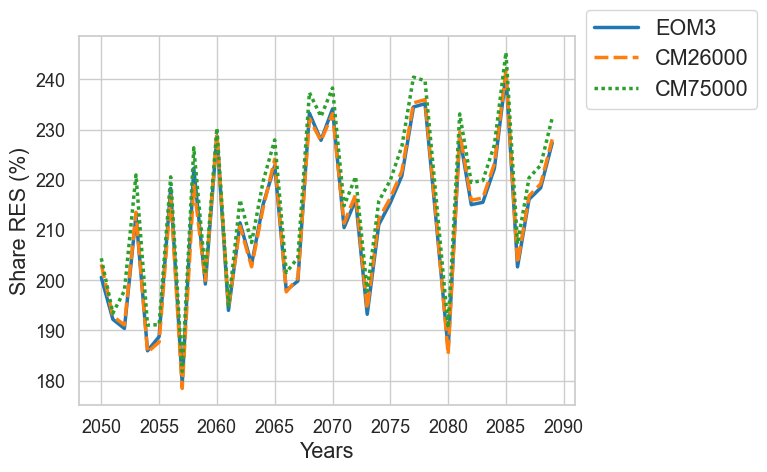

In [43]:
percentage_RES = ShareRES_data
axs8 = sns.lineplot(data=percentage_RES, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Share RES (%)', fontsize='large')
plt.legend(fontsize='large',   bbox_to_anchor=(1, 1.1))
#axs8.set_title('Share RES')
fig8 = axs8.get_figure()
fig8.savefig(path_to_plots + '/' + 'Share RES.png', bbox_inches='tight', dpi=300)


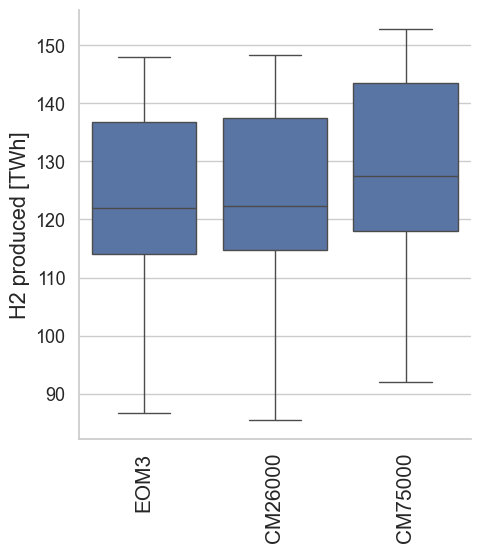

In [44]:
H2Production_data_twh = (H2Production_data/1000000)*0.74 # 74% electrolyzers efficiency
axs1 = sns.catplot( data=pd.melt(H2Production_data_twh), x="variable", y="value",  kind="box")
plt.xlabel('', fontsize='large')
plt.ylabel('H2 produced [TWh]', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=90, size = 15)   
axs1.savefig(path_to_plots + '/' + 'Electrolyzer_boxes.png', bbox_inches='tight', dpi=300)

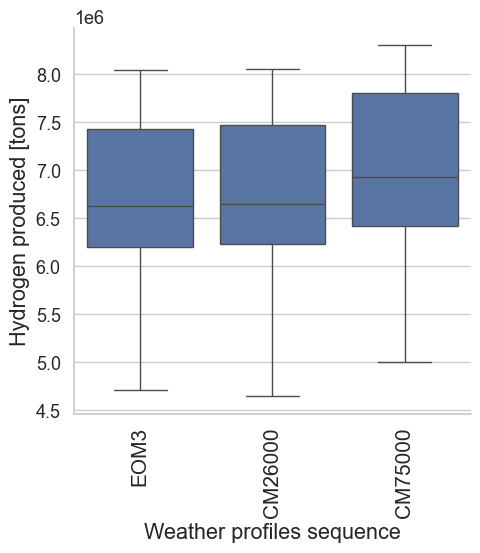

In [45]:
Energy_consumed_in_electrolysis = 1/ 0.74
#Hydrogen produced (kg) = Energy consumed in electrolysis (kWh) / LHV of hydrogen kWh/kg
kg_hydrogen_per_kwh= Energy_consumed_in_electrolysis/ 33.6  
ton_hydrogen_per_mwh = kg_hydrogen_per_kwh
H2Production_tons = H2Production_data*ton_hydrogen_per_mwh
axs1 = sns.catplot( data=pd.melt(H2Production_tons), x="variable", y="value",  kind="box")
plt.xlabel('Weather profiles sequence', fontsize='large')
plt.ylabel('Hydrogen produced [tons]', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=90, size = 15)   
axs1.savefig(path_to_plots + '/' + 'Hydrogen production_boxes.png', bbox_inches='tight', dpi=300)

In [46]:
# sns.set_theme(style="whitegrid")
# sns.set(font_scale=1.2)
# sheet_name = "groupedDecarbonizedNL"
# df = pd.read_excel("C:\\toolbox-amiris-emlab\\data\\Power_plants.xlsx",
#                    sheet_name=sheet_name)

# colors = [technology_colors[tech] for tech in df["Technology"].unique()]

# fig1 = sns.relplot(x="Age", y="Efficiency", hue="Technology", size="Capacity",
#                    sizes=(40, 400), alpha=.5, palette=colors,
#                    height=6, data=df)
# plt.xlabel("Age", fontsize="large")
# plt.ylabel("Efficiency", fontsize="large")
# fig1.savefig(path_to_plots + '/' + 'Initial_power_plants' +sheet_name + '.png', bbox_inches='tight', dpi=300)


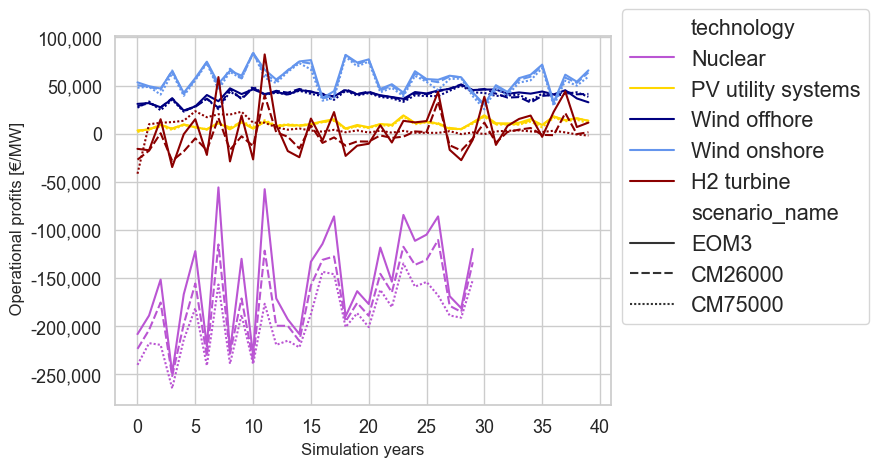

In [47]:

AverageProfits_filtered = AverageProfits.loc[:, (slice(None), selected_scenarios)]

colors = [technology_colors[key] for key in AverageProfits_filtered.columns.levels[0].unique()]
AverageProfits_all = pd.melt(AverageProfits_filtered.reset_index(), id_vars='index')
AverageProfits_all.replace(technology_names, inplace=True)

fig, ax = plt.subplots()
sns.lineplot(x="index", y="value",  hue = "technology", style="scenario_name",
             data=AverageProfits_all, 
             palette=colors
           ).set(xlabel='Simulation years', ylabel=' Operational profits [€/MW]')
plt.legend(fontsize='large',   bbox_to_anchor=(1, 1.1))
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.savefig(path_to_plots + '/' + 'operational_profits.png', bbox_inches='tight', dpi=300)

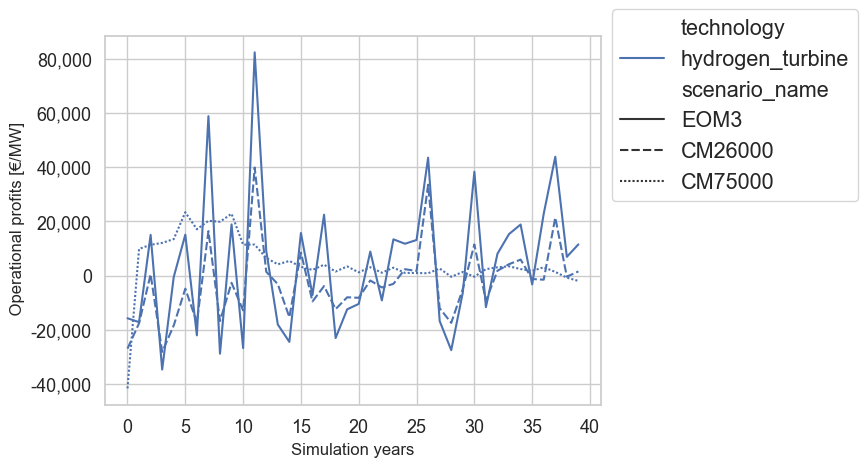

In [48]:
gasplants  = AverageProfits.loc[:, ("hydrogen_turbine", slice(None))]
gasplants_all = pd.melt(gasplants.reset_index(), id_vars='index')

fig, ax = plt.subplots()
sns.lineplot(x="index", y="value",  hue = "technology", style="scenario_name",
             data=gasplants_all, 
           ).set(xlabel='Simulation years', ylabel=' Operational profits [€/MW]')
plt.legend(fontsize='large',   bbox_to_anchor=(1, 1.1))
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.savefig(path_to_plots + '/' + 'gas plants operational profit.png', bbox_inches='tight', dpi=300)


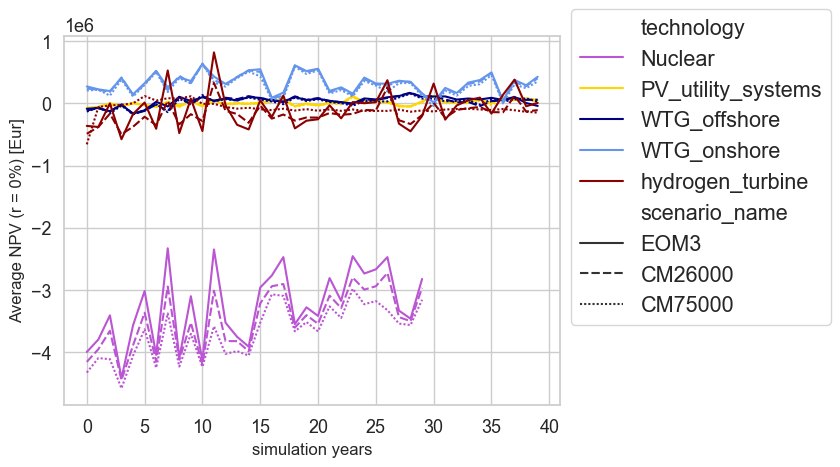

In [49]:
colors = [technology_colors[key] for key in AverageNPVpertechnology.columns.get_level_values(0).unique()]
AverageNPVpertechnology_all = pd.melt(AverageNPVpertechnology.reset_index(), id_vars='index')
AverageNPVpertechnology_all.head()
sns.lineplot(x="index", y="value",  hue = "technology", style="scenario_name",
             data=AverageNPVpertechnology_all, 
             palette=colors
           ).set(xlabel='simulation years', ylabel='Average NPV (r = 0%) [Eur]')
plt.legend(fontsize='large',   bbox_to_anchor=(1, 1.1))

plt.savefig(path_to_plots + '/' + 'NPVs_0_dscount_rate.png', bbox_inches='tight', dpi=300)

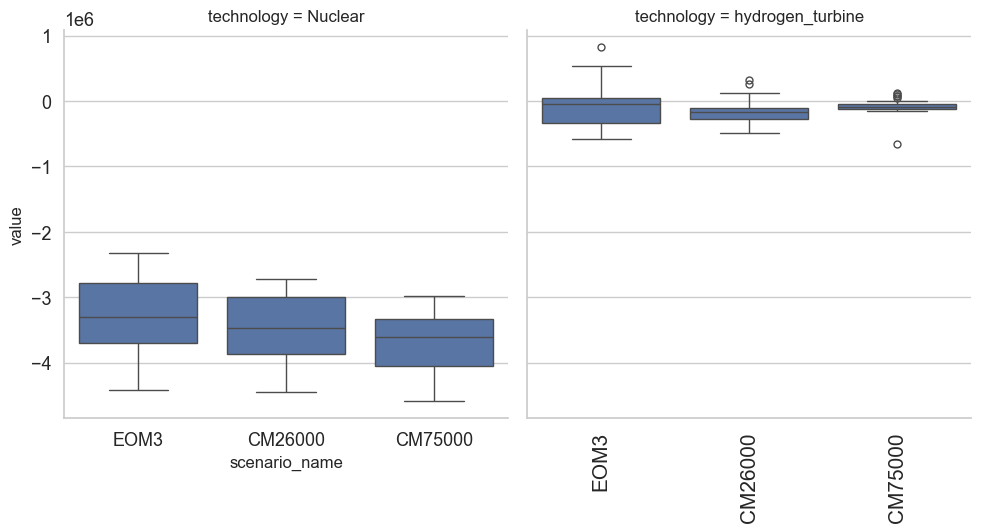

In [50]:
options =["Nuclear", "hydrogen_turbine"] 
dispatchable = AverageNPVpertechnology_all[AverageNPVpertechnology_all['technology'].isin(options)]
axs1 = sns.catplot( data=dispatchable, col="technology", y="value", x="scenario_name", kind="box")
plt.xlabel('', fontsize='large')
plt.ylabel('Monthly Electricity Prices Eur/MWh ', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=90, size = 15)
axs1.savefig(path_to_plots + '/' + 'Dispatchable_plants_all.png', bbox_inches='tight', dpi=300)

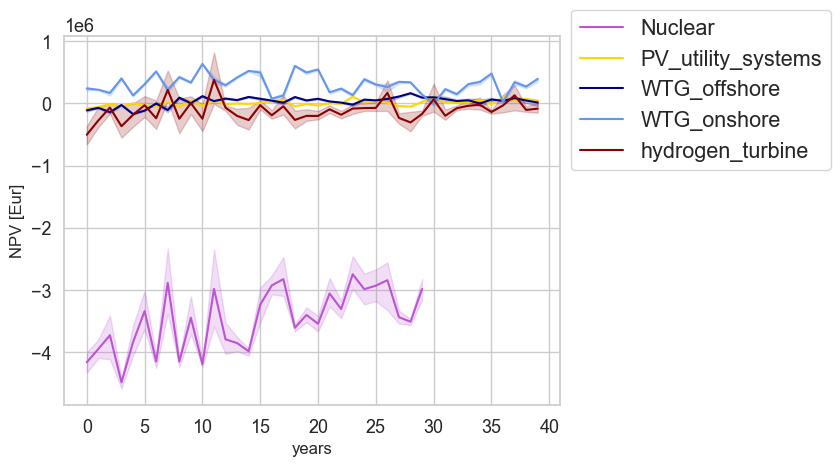

In [51]:
sns.lineplot(x="index", y="value",  hue = "technology",# style="scenario_name",
            data=AverageNPVpertechnology_all,    palette=colors).set(xlabel='years', ylabel='NPV [Eur]')
plt.legend(fontsize='large',   bbox_to_anchor=(1, 1.1))
plt.savefig(path_to_plots + '/' + 'NPVs_0_dscount_rate_all.png', bbox_inches='tight', dpi=300)

In [52]:
# FLH_data = pd.read_excel(path_to_results, sheet_name='FLH', index_col=0)
# Years_data = pd.read_excel(path_to_results, sheet_name='YEARS', index_col=0)

In [53]:
min_val = InstalledCapacity_data.min()
max_val = InstalledCapacity_data.max()
normalized_capacity = (InstalledCapacity_data - min_val) / (max_val - min_val)
normalized_capacity.head()

,EOM3,CM26000,CM75000
2051,0.338622,0.326006,0.000000
2052,0.000000,0.000000,0.370720
2053,0.000000,0.000000,0.471825
2054,0.096749,0.279434,0.471825
2055,0.371130,0.450447,0.595578


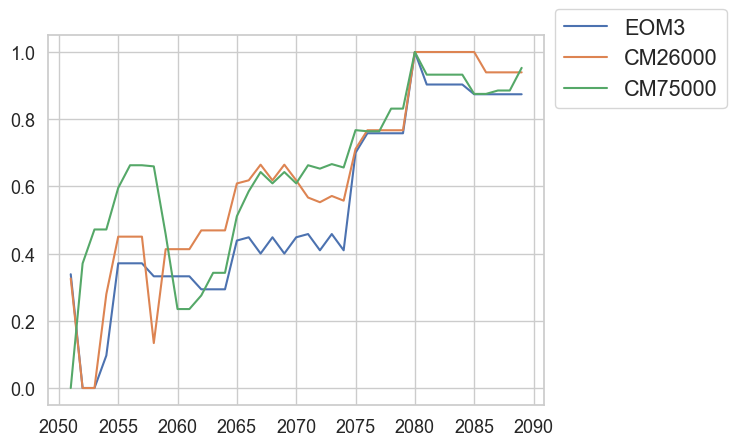

In [54]:
normalized_capacity.plot()
plt.legend(fontsize='large', loc='upper left', bbox_to_anchor=(1, 1.1))

In [55]:
# full_load_hours = pd.DataFrame()
# full_load_hours= Years_data.applymap(FLH_data['average'].get)
# full_load_hours["year"] = full_load_hours.index.values + 2050
# full_load_hours.set_index('year', inplace = True)
# full_load_hours.drop(2050, inplace = True)
# min_val = full_load_hours.min()
# max_val = full_load_hours.max()
# normalized_FLH = (full_load_hours - min_val) / (max_val - min_val)

In [56]:
# normalized_ElectricityPrices = ElectricityPrices_data.copy()
# normalized_ElectricityPrices.drop(2050, inplace = True)
# min_val = normalized_ElectricityPrices.min()
# max_val = normalized_ElectricityPrices.max()
# normalized_ElectricityPrices = (normalized_ElectricityPrices - min_val) / (max_val - min_val)

In [57]:
# bwr_reversed = plt.cm.get_cmap('bwr')
# num_columns = len(normalized_FLH.columns)
# fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(13, 8))

# for i, col1 in enumerate(normalized_FLH.columns):
#     print(col1)
#     if i == 0:
#         ax = axes[0,0]    
#     elif  i % 2 == 0:
#         ax =axes[0,round(i/2)]        
#     else:
#         ax = axes[1,math.floor(i/2)]    
#     ax.scatter(normalized_FLH[col1], normalized_capacity[col1], c=normalized_ElectricityPrices[col1], cmap='viridis') 
#     ax.set_title(col1)
#     ax.set_xlabel('normalized_FLH')
#     ax.set_ylabel("normalized_capacity")
# # plt.xlabel('normalized_FLH')
# # plt.ylabel("normalized_capacity")

# plt.tight_layout()
# plt.show()

In [58]:
# for i, col1 in enumerate(normalized_FLH.columns):
#     if i ==0: 
#         pass
#     else:
#         filteredrows =  (normalized_FLH[col1] >= 0.8) & (normalized_FLH[col1] <= 1)
#         plt.scatter(normalized_FLH[col1][filteredrows],
#                     normalized_capacity[col1][filteredrows],
#                     c=normalized_ElectricityPrices[col1][filteredrows], cmap=bwr_reversed,  alpha=0.5) 
# plt.xlabel('normalized Full Load hours')
# plt.ylabel("normalized Installed Capacity")

# plt.legend()
# plt.savefig(path_to_plots + '/' + 'yearly_capacity_FLH.png', bbox_inches='tight', dpi=300)

In [59]:
#ElectricityPrices_data_minus2050  = ElectricityPrices_data.drop(2050)

In [60]:
# for i, col1 in enumerate(normalized_FLH.columns):
#     if i ==0: 
#         pass
#     else:
#         plt.scatter(full_load_hours[col1], InstalledCapacity_data[col1]/1000, 
#                     c=ElectricityPrices_data_minus2050[col1], cmap=bwr_reversed,  alpha=0.5) 
# plt.xlabel(' average full Load hours (wind + solar)')
# plt.ylabel("Installed Capacity GW")        
# plt.colorbar( orientation='vertical',
#              label="Yearly Electricity prices Eur/MWh")

# plt.savefig(path_to_plots + '/' + 'yearly_capacity_vs_FLH.png', bbox_inches='tight', dpi=300)        

In [61]:
# H2Production_data_twh_clean = H2Production_data_twh.drop(2050)

In [62]:
# for i, col1 in enumerate(normalized_FLH.columns):
#     if i ==0: 
#         pass
#     else:
#         plt.scatter(normalized_FLH[col1], normalized_capacity[col1], 
#                     c=H2Production_data_twh_clean[col1], cmap=bwr_reversed,  alpha=0.5) 
# plt.colorbar( orientation='vertical',
#              label="hydrogen production")        
# plt.xlabel('normalized Full Load hours')
# plt.ylabel("normalized Installed Capacity")   

In [63]:
# Years_data["year"] = Years_data.index.values + 2050
# Years_data.set_index('year', inplace = True)
# Years_data.drop(2050, inplace = True)

In [64]:
# high_electricity_years = Years_data[ElectricityPrices_data>50]
# high_electricity_years_all = pd.melt(high_electricity_years )
# high_electricity_years_all.drop("variable", axis = 1, inplace = True)

In [65]:
# high_electricity_years_all.value_counts()
# count_per_row = high_electricity_years.apply(lambda row: row.value_counts(), axis=1)
# print(count_per_row)

In [66]:
melted_electricity_prices = ElectricityPrices_data[selected_scenarios].copy()
melted_electricity_prices.reset_index(inplace = True)
melted_electricity_prices =melted_electricity_prices.melt(id_vars='year', var_name='Variable', value_name='Value')

In [67]:
melted_LOLE = LOL_data[selected_scenarios].copy()
melted_LOLE.reset_index(inplace=True)
melted_LOLE = melted_LOLE.melt(id_vars='year', var_name='Variable', value_name='Value')

melted_cost_recovery = CostRecovery_data[selected_scenarios].copy()
melted_cost_recovery.reset_index(inplace=True)
melted_cost_recovery = melted_cost_recovery.melt(id_vars='year', var_name='Variable', value_name='Value') 

ENS= ENS_data.copy()
ENS_GWh = ENS/1000
melted_ENS = ENS_GWh[selected_scenarios].copy()
melted_ENS.reset_index(inplace=True)
melted_ENS = melted_ENS.melt(id_vars='year', var_name='Variable', value_name='Value')

melted_H2Production_data_twh = H2Production_data_twh[selected_scenarios].copy()
melted_H2Production_data_twh.reset_index(inplace = True)
melted_H2Production_data_twh.head()
melted_H2Production_data_twh =melted_H2Production_data_twh.melt(id_vars='year', var_name='Variable', value_name='Value')

In [68]:

# fig, axes= plt.subplots(nrows=5, ncols=1, figsize=(5, 6))
# axes[0].set_ylabel('LOLE \n [hours]', fontsize='medium')
# LOL_data["fix_profiles"].plot( ax=axes[0], color = "green")
# LOL_data["stochastic_increase_demand"].plot( ax=axes[0], color = "red", linestyle='dashed')
# sns.lineplot(x="year", y="Value",ax=axes[0],  data=melted_LOLE[melted_LOLE["Variable"].isin(selected_scenarios)],
#             errorbar=('ci', 100))
# axes[0].legend(["baseline","increasing demand", "mean stochastic profiles", "stochastic profiles"], fontsize='medium',  bbox_to_anchor=(1 , 1))
# axes[0].set_xticklabels([])
# axes[0].set_xlabel([])

# axes[1].set_ylabel('EENS \n [GWh]', fontsize='medium')
# ENS_GWh["fix_profiles"].plot( ax=axes[1], color = "green")
# ENS_GWh["stochastic_increase_demand"].plot( ax=axes[1], color = "red", linestyle='dashed')
# sns.lineplot(x="year", y="Value",ax=axes[1],  data=melted_ENS[melted_ENS["Variable"].isin(selected_scenarios)],
#             errorbar=('ci', 100))
# axes[1].legend().remove()
# axes[1].set_xticklabels([])
# axes[1].set_xlabel([])

# axes[2].set_ylabel('WAvg \n electricity \n prices \n [Eur/MWh]', fontsize='medium')
# ElectricityPrices_data["fix_profiles"].plot( ax=axes[2], color = "green")
# ElectricityPrices_data["stochastic_increase_demand"].plot( ax=axes[2], color = "red", linestyle='dashed')
# sns.lineplot(x="year", y="Value", ax=axes[2], data=melted_electricity_prices[melted_electricity_prices["Variable"].isin(selected_scenarios)],
#             errorbar=('ci', 100))
# axes[2].legend().remove()
# axes[2].set_xticklabels([])
# axes[2].set_xlabel([])

# axes[3].set_ylabel('H2 \n production \n[TWh]', fontsize='medium')
# sns.lineplot(x="year", y="Value", ax=axes[3], data=melted_H2Production_data_twh, errorbar=('ci', 100))
# axes[3].set_xticklabels([])
# axes[3].set_xlabel([])
# H2Production_data_twh["fix_profiles"].plot( ax=axes[3], color = "green")
# H2Production_data_twh["stochastic_increase_demand"].plot( ax=axes[3], color = "red", linestyle='dashed')

# axes[4].set_ylabel('Cost \nrecovery\n %', fontsize='medium')
# CostRecovery_data["fix_profiles"].plot( ax=axes[4], color = "green")
# CostRecovery_data["stochastic_increase_demand"].plot( ax=axes[4], color = "red", linestyle='dashed')
# sns.lineplot(x="year", y="Value", ax=axes[4], 
#              data=melted_cost_recovery[melted_cost_recovery["Variable"].isin(selected_scenarios)],
#             errorbar=('ci', 100))
# axes[4].set_xlabel('Simulation years', fontsize='medium') 
# axes[4].legend().remove()
# plt.subplots_adjust(hspace=0.2) 
# plt.savefig(path_to_plots + '/' + 'LOLE_prices_recovery.png', bbox_inches='tight', dpi=300)     

In [69]:
# monthly_prices=  Monthly_ElectricityPrices_data[selected_scenarios].copy()
# monthly_prices.reset_index(inplace = True)
# monthly_prices.head()
# monthly_prices =monthly_prices.melt(id_vars='years', var_name='Variable', value_name='Value')

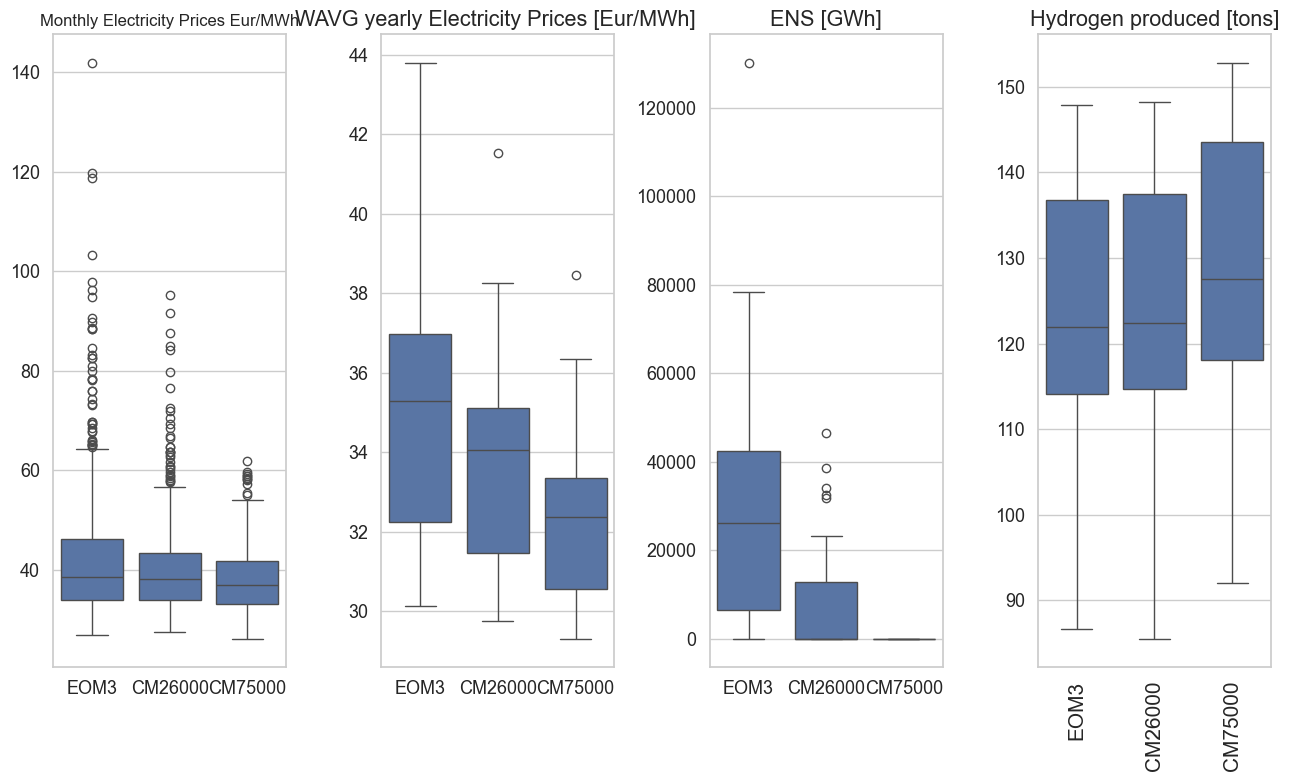

In [70]:
fig, axes= plt.subplots(nrows=1, ncols=4, figsize=(13, 8))
sns.boxplot( ax=axes[0], data=pd.melt(Monthly_ElectricityPrices_data),  x="variable", y="value")
axes[0].set_title('Monthly Electricity Prices Eur/MWh')
#axes[0].set_xticks(rotation=90, size = 15)
plt.xticks(rotation=90, size = 15)   

sns.boxplot( data=pd.melt(ElectricityPrices_data), ax=axes[1], x="variable", y="value")
axes[1].set_title('WAVG yearly Electricity Prices [Eur/MWh] ', fontsize='large')
plt.xticks(rotation=90, size = 15)   
  
sns.boxplot( data=pd.melt(ENS_data), ax=axes[2],  x="variable", y="value")
axes[2].set_title('ENS [GWh]', fontsize='large')
plt.xticks(rotation=90, size = 15)   

sns.boxplot( data=pd.melt(H2Production_data_twh),  ax=axes[3], x="variable", y="value")
axes[3].set_title('Hydrogen produced [tons]', fontsize='large')


axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')
axes[3].set_xlabel('')

plt.xticks(rotation=90)   
plt.tight_layout()
axs1.savefig(path_to_plots + '/' + 'All.png', bbox_inches='tight', dpi=300)


In [71]:
iterations_NPV =  AverageNPVpertechnology_all[AverageNPVpertechnology_all["scenario_name"].isin(selected_scenarios)]
iterations_NPV_ = iterations_NPV.groupby(["index"])["value"].describe()


In [72]:
fix_profiles_NPV =  AverageNPVpertechnology_all[AverageNPVpertechnology_all["scenario_name"]=="fix_profiles"]
fix_profiles_NPV_ = fix_profiles_NPV.groupby(["index"])["value"].describe()


ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.numeric.Int64Index'> was passed

In [ ]:
stochasticNPV =  AverageNPVpertechnology_all[AverageNPVpertechnology_all["scenario_name"]=="stochastic_increase_demand"]
stochasticNPV_ = stochasticNPV.groupby(["index"])["value"].describe()


In [ ]:
iterations_profits =  AverageProfits_all[AverageProfits_all["scenario_name"].isin(selected_scenarios)]
iterations_profits_ = iterations_profits.groupby(["index"])["value"].describe()

In [ ]:
AverageProfits_all

In [ ]:
fix_profiles_profits =  AverageProfits_all[AverageProfits_all["scenario_name"]=="fix_profiles"]
fix_profiles_profits_ = fix_profiles_profits.groupby(["index"])["value"].describe()
fix_profiles_profits_

In [ ]:
stochastic_profits =  AverageProfits_all[AverageProfits_all["scenario_name"]=="stochastic_increase_demand"]
stochastic_profits_ = stochastic_profits.groupby(["index"])["value"].describe()


In [ ]:
ser1 = pd.concat([fix_profiles_NPV_[["mean", "std"]], stochasticNPV_[["mean", "std"]], iterations_NPV_[["mean", "std"]]], axis = 1)
ser1

In [ ]:
ser2 = pd.concat([fix_profiles_profits_[["mean", "std"]], stochastic_profits_[["mean", "std"]], iterations_profits_[["mean", "std"]]], axis = 1)
ser2

In [ ]:
file = excelnpv =  os.path.join(path_to_plots,  "NPVs.xlsx")
with pd.ExcelWriter(file) as writer:
    ser1.to_excel(writer, sheet_name="npv", index=False)
    ser2.to_excel(writer, sheet_name="profits", index=False)

In [ ]:
column_name_mapping = {
    'iteration1': 'stochastic profiles',
    'iteration2': 'stochastic profiles',
    'iteration3': 'stochastic profiles',
    'iteration4': 'stochastic profiles',
    'iteration5': 'stochastic profiles',
    'iteration6': 'stochastic profiles',
    'iteration7': 'stochastic profiles',
    'iteration8': 'stochastic profiles',
    'iteration9': 'stochastic profiles',
    'iteration10': 'stochastic profiles',
    'stochastic_increase_demand': 'increasing demand',
    'fix_profiles': 'baseline',
}



In [ ]:
# Use the rename method to change column names
NPVNewPlants_data = NPVNewPlants_data.loc[["PV_utility_systems", "WTG_offshore","WTG_onshore", "hydrogen_turbine"]]
NPVNewPlants_data.rename(columns=column_name_mapping, inplace=True)
meltedNPV =  pd.melt(NPVNewPlants_data.reset_index(), id_vars='index')
sns.boxplot(x="index", y="value",  hue="variable",
            data=meltedNPV)
sns.stripplot(x="index", y="value",  hue="variable",
            data=meltedNPV, dodge=True , legend = False).set(xlabel='', ylabel='')
plt.ylabel('NPV new plants Eur', fontsize='medium') 
plt.legend(fontsize='large',   bbox_to_anchor=(1, 1.1))
plt.savefig(path_to_plots + '/' + 'NPV.png', bbox_inches='tight', dpi=300) 

In [ ]:
IRRNewPlants_raw = IRRNewPlants_data.loc[["PV_utility_systems", "WTG_offshore","WTG_onshore", "hydrogen_turbine"]]
IRRNewPlants = IRRNewPlants_raw*100
IRRNewPlants.rename(columns=column_name_mapping, inplace=True)

IRRNewPlants.rename(index=technology_names, inplace=True)
meltedIRR =  pd.melt(IRRNewPlants.reset_index(), id_vars='index')

fig, ax = plt.subplots()
ax = sns.boxplot(x="index", y="value",  hue="variable",
            data=meltedIRR).set(xlabel='', ylabel='IRR  %')
sns.stripplot(x="index", y="value",  hue="variable",
            data=meltedIRR, dodge=True , legend = False).set(xlabel='', ylabel='')

plt.legend( title="", loc='upper left', fontsize='large')
plt.ylabel('IRR %', fontsize='medium') 
plt.savefig(path_to_plots + '/' + 'IRRs.png', bbox_inches='tight', dpi=300)
